# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
### STATISTICS ###
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 

### PRE PROCESSING DATA ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


### EDA ###
import scipy.stats as stats

### CLUSTERING ###
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



### VISUALIZATION ###
from sklearn.decomposition import PCA 

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv("bank-dataset-kaggle.csv")
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Cek tipe data setiap kolom
print(df.dtypes)

# Cek 5 data pertama
print(df.head())

# Cek jumlah missing values per kolom
print(df.isnull().sum())

# Persentase missing values
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -

In [5]:
# Cek jumlah missing values per kolom
print(df.isnull().sum())

# Persentase missing values
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64
age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
Target       0.0
dtype: float64


In [4]:
# Statistik deskriptif variabel numerik
print(df.describe())


                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

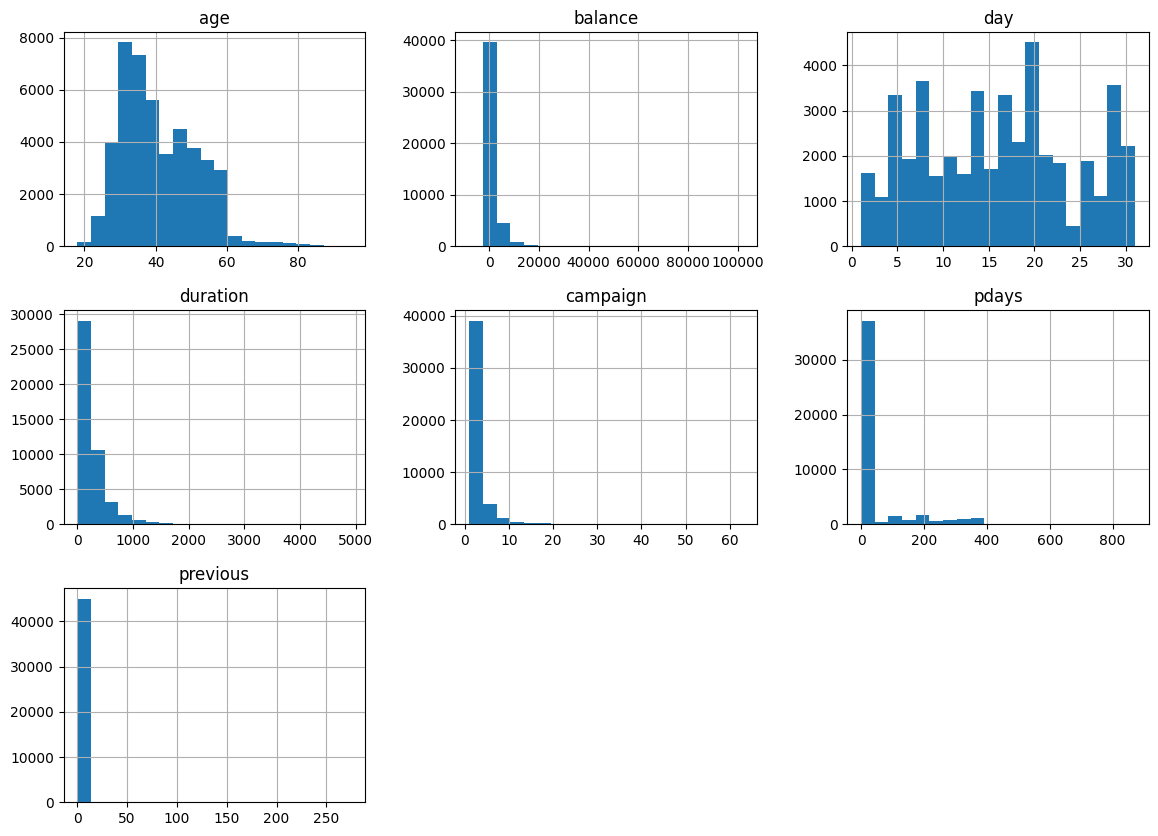

In [5]:
import matplotlib.pyplot as plt

# Plot histogram untuk variabel numerik
df.hist(figsize=(14, 10), bins=20)
plt.show()


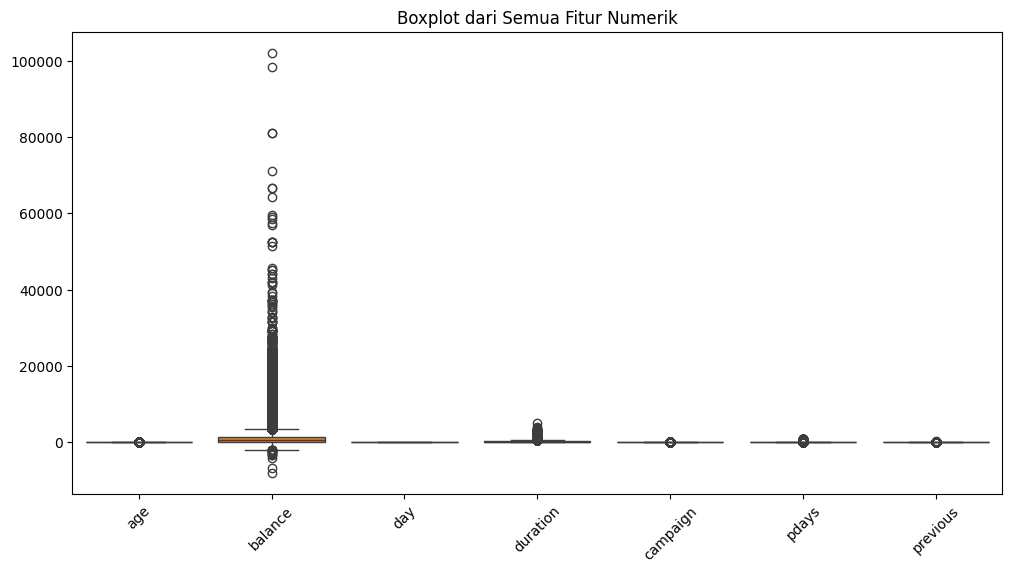

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot dari Semua Fitur Numerik")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Ambil 8 fitur
selected_cols = ['age', 'balance', 'education', 'duration', 'campaign','previous','pdays']
df_selected = df[selected_cols].copy()

# 2. Definisikan kolom kategorikal dan numerik
cat_cols = [ 'education']
num_cols = ['age', 'balance', 'duration', 'campaign','previous','pdays']

# 3. Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)  # drop='first' biar gak dummy trap
])

# 4. Fit dan transform
X_processed = preprocessor.fit_transform(df_selected)

# 5. Konversi ke DataFrame
# Ambil nama kolom dari encoder
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
all_feature_names = num_cols + list(ohe_feature_names)

df_processed = pd.DataFrame(X_processed.toarray() if hasattr(X_processed, 'toarray') else X_processed,
                            columns=all_feature_names)

# Final cek
print("Data siap untuk clustering. Shape:", df_processed.shape)
df_processed.head()

Data siap untuk clustering. Shape: (45211, 9)


,age,balance,duration,campaign,previous,pdays,education_secondary,education_tertiary,education_unknown
0,0.519481,0.092259,0.053070,0.0,0.0,0.0,0.0,1.0,0.0
1,0.337662,0.073067,0.030704,0.0,0.0,0.0,1.0,0.0,0.0
2,0.194805,0.072822,0.015453,0.0,0.0,0.0,1.0,0.0,0.0
3,0.376623,0.086476,0.018707,0.0,0.0,0.0,0.0,0.0,1.0
4,0.194805,0.072812,0.040260,0.0,0.0,0.0,0.0,0.0,1.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

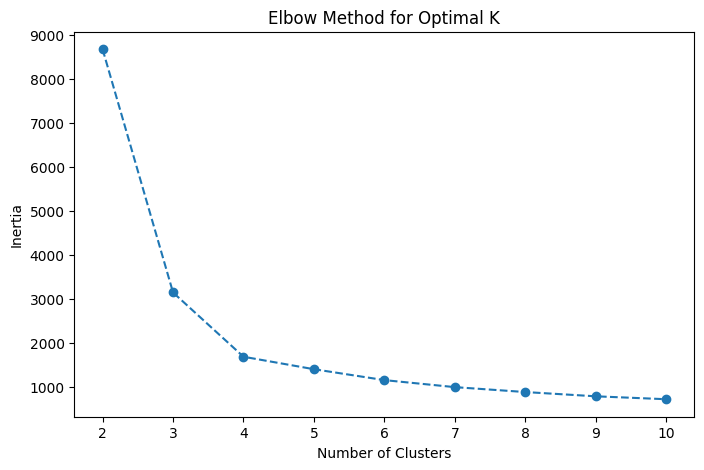

In [7]:
inertia = []
k_values = range(2, 11)  # Coba cluster 2-10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_processed)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

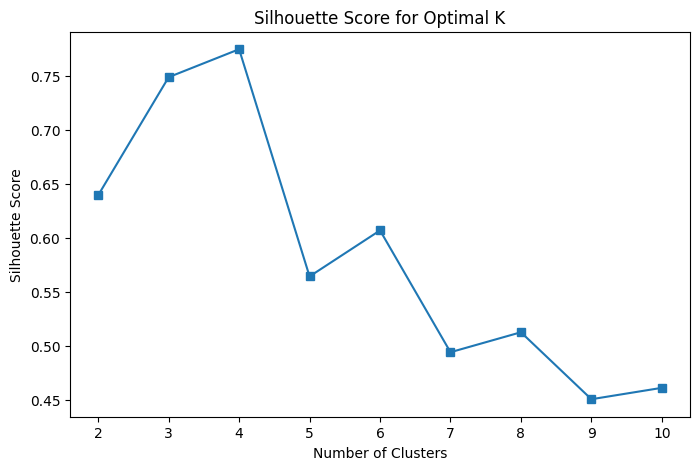

Jumlah cluster optimal berdasarkan Silhouette Score: K = 4
Silhouette Score tertinggi: 0.78


In [8]:
silhouette_scores = []
K_range = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_processed)
    silhouette_scores.append(silhouette_score(df_processed, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(k_values, silhouette_scores, marker='s', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

best_K = K_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: K = {best_K}")
print(f"Silhouette Score tertinggi: {best_score:.2f}")

In [17]:
k_optimal = 4  # Ganti dengan hasil terbaik dari Elbow & Silhouette
final_kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df_processed['Cluster'] = final_kmeans.fit_predict(df_processed)

In [21]:
df_processed

,age,balance,duration,campaign,previous,pdays,education_secondary,education_tertiary,education_unknown,Cluster
0,0.519481,0.092259,0.053070,0.000000,0.000000,0.000000,0.0,1.0,0.0,0
1,0.337662,0.073067,0.030704,0.000000,0.000000,0.000000,1.0,0.0,0.0,1
2,0.194805,0.072822,0.015453,0.000000,0.000000,0.000000,1.0,0.0,0.0,1
3,0.376623,0.086476,0.018707,0.000000,0.000000,0.000000,0.0,0.0,1.0,3
4,0.194805,0.072812,0.040260,0.000000,0.000000,0.000000,0.0,0.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.198658,0.032258,0.000000,0.000000,0.0,1.0,0.0,0
45207,0.688312,0.088501,0.092721,0.016129,0.000000,0.000000,0.0,0.0,0.0,2
45208,0.701299,0.124689,0.229158,0.064516,0.010909,0.212156,1.0,0.0,0.0,1
45209,0.506494,0.078868,0.103294,0.048387,0.000000,0.000000,1.0,0.0,0.0,1


In [22]:
df['cluster'] = df_processed['Cluster']

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
####

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

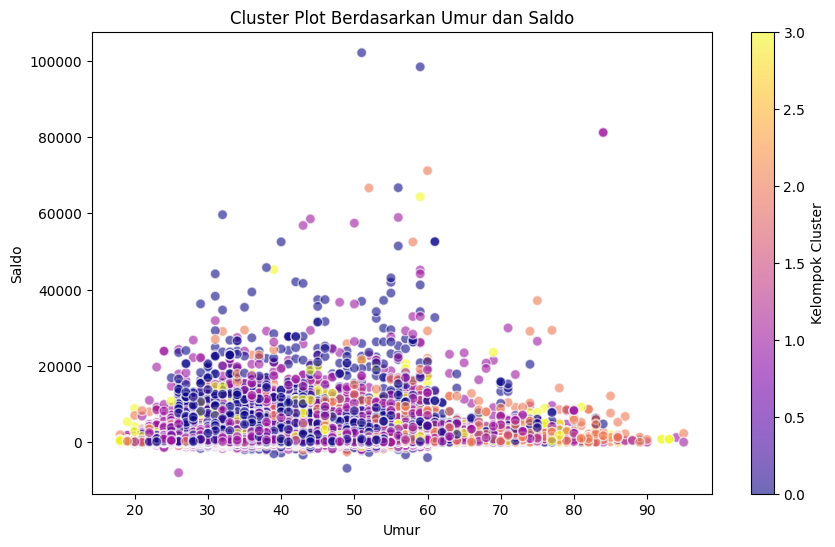

In [19]:
import matplotlib.pyplot as plt

# Set ukuran canvas plot
plt.figure(figsize=(10, 6))

# Scatter plot dengan warna berdasarkan cluster
plt.scatter(
    df['age'], 
    df['balance'], 
    c=df['cluster'], 
    cmap='plasma',      
    s=50, 
    alpha=0.6, 
    edgecolors='white', 
    marker='o'
)

# Tambahin judul dan label sumbu
plt.title('Cluster Plot Berdasarkan Umur dan Saldo')
plt.xlabel('Umur')
plt.ylabel('Saldo')

# Tambahin legend warna cluster
plt.colorbar(label='Kelompok Cluster')

# Tampilkan plot
plt.show()


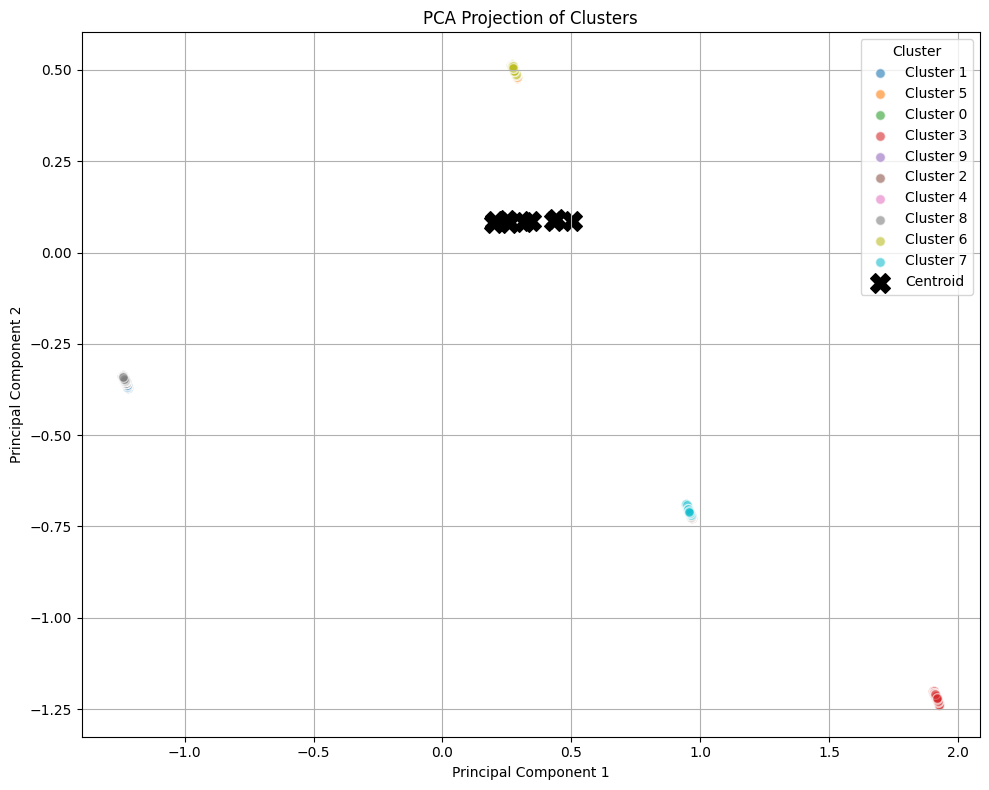

In [20]:
# Step 1: Reduksi dimensi jadi 2 komponen utama pakai PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_processed)

# Step 2: Simpan hasil PCA ke DataFrame untuk visualisasi
pca_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
pca_df['cluster'] = pd.Categorical(kmeans.labels_)  # Tambahin info cluster ke DataFrame
unique_clusters = pca_df['cluster'].unique()

# Step 3: Plot hasil cluster dengan PCA (plus centroids-nya)
plt.figure(figsize=(10, 8))
for cluster in unique_clusters:
    cluster_data = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(
        cluster_data['PC1'], cluster_data['PC2'],
        label=f'Cluster {cluster}',
        s=50, alpha=0.6,
        edgecolors='white',
        marker='o'
    )

# Plot centroids-nya
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c='black', s=200, marker='X', label='Centroid',
)

# Label dan dekorasi
plt.title('PCA Projection of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
df_processed['Cluster']

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [23]:
# 1. Ambil kembali bagian numerik dan kategorikal dari hasil transformasi
num_processed = df_processed[num_cols].values
cat_processed = df_processed[ohe_feature_names].values

# 2. Inverse transform bagian numerik
num_original = preprocessor.named_transformers_['num'].inverse_transform(num_processed)

# 3. Inverse transform bagian kategorikal
cat_original = preprocessor.named_transformers_['cat'].inverse_transform(cat_processed)

# 4. Gabungkan kembali ke DataFrame
df_inverse = pd.DataFrame(num_original, columns=num_cols)
df_inverse[cat_cols] = cat_original  # tambahkan kolom kategorikal balik

# 5. Final cek
print("Hasil inverse transform:")
df_inverse.head()

df_inverse['cluster'] = df_processed['Cluster']


Hasil inverse transform:


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [96]:
# Grouping data berdasarkan cluster
grouped = df.groupby('cluster')

# Looping untuk menampilkan statistik deskriptif tiap cluster sebagai tabel terpisah
for cluster_label, group in grouped:
    print(f"\n Statistik Deskriptif - Cluster {cluster_label}\n")
    display(group.describe().T)  # Transpose biar fitur jadi baris



 Statistik Deskriptif - Cluster 0



,count,mean,std,min,25%,50%,75%,max
age,13301.0,39.593640,9.887923,20.0,32.0,37.0,46.0,89.0
balance,13301.0,1758.416435,3839.088305,-6847.0,104.0,577.0,1804.0,102127.0
day,13301.0,16.086535,8.462004,1.0,8.0,17.0,22.0,31.0
duration,13301.0,258.518532,264.938057,2.0,101.0,176.0,318.0,4918.0
campaign,13301.0,2.825577,3.146753,1.0,1.0,2.0,3.0,51.0
pdays,13301.0,39.024134,95.780024,-1.0,-1.0,-1.0,-1.0,871.0
previous,13301.0,0.661980,3.139468,0.0,0.0,0.0,0.0,275.0
cluster,13301.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0



 Statistik Deskriptif - Cluster 1



,count,mean,std,min,25%,50%,75%,max
age,23202.0,39.964270,10.159568,18.0,32.0,38.0,47.0,95.0
balance,23202.0,1154.880786,2558.256739,-8019.0,55.0,392.0,1234.0,81204.0
day,23202.0,15.759159,8.307099,1.0,8.0,16.0,21.0,31.0
duration,23202.0,258.685760,253.310692,0.0,105.0,183.0,321.0,3881.0
campaign,23202.0,2.700802,2.985786,1.0,1.0,2.0,3.0,55.0
pdays,23202.0,42.353504,103.589692,-1.0,-1.0,-1.0,-1.0,842.0
previous,23202.0,0.567753,1.849867,0.0,0.0,0.0,0.0,55.0
cluster,23202.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0



 Statistik Deskriptif - Cluster 2



,count,mean,std,min,25%,50%,75%,max
age,6851.0,45.865567,11.401980,18.0,37.0,45.0,54.0,95.0
balance,6851.0,1250.949934,2690.743991,-2604.0,61.0,403.0,1390.0,71188.0
day,6851.0,15.421398,7.975752,1.0,9.0,15.0,21.0,31.0
duration,6851.0,255.933002,260.279981,0.0,103.0,178.0,312.0,3078.0
campaign,6851.0,2.834331,3.166683,1.0,1.0,2.0,3.0,58.0
pdays,6851.0,36.081740,97.557124,-1.0,-1.0,-1.0,-1.0,791.0
previous,6851.0,0.489272,1.897365,0.0,0.0,0.0,0.0,58.0
cluster,6851.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0



 Statistik Deskriptif - Cluster 3



,count,mean,std,min,25%,50%,75%,max
age,1857.0,44.510501,12.196400,18.0,36.0,45.0,53.0,93.0
balance,1857.0,1526.754443,3152.228273,-1445.0,106.0,568.0,1699.0,64343.0
day,1857.0,15.810985,8.689590,1.0,8.0,16.0,22.0,31.0
duration,1857.0,257.313947,245.622775,4.0,99.0,180.0,332.0,2429.0
campaign,1857.0,2.849219,3.778611,1.0,1.0,2.0,3.0,63.0
pdays,1857.0,36.856220,95.226077,-1.0,-1.0,-1.0,-1.0,687.0
previous,1857.0,0.488422,1.569167,0.0,0.0,0.0,0.0,27.0
cluster,1857.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


Tulis hasil interpretasinya di sini.

## Cluster 0  Segment Mass Market Aktif:
- **Rata-rata Usia:** 39,83 tahun  
- **Rata-rata Saldo (Balance):** 370.67  
- **Rata-rata Durasi Kontak (detik):** 239.53  
- **Rata-rata Jumlah Kontak Sebelumnya:** 0.47  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan usia produktif dan saldo rendah. Durasi kontak menunjukkan ketertarikan yang cukup saat dihubungi. Pelanggan di segmen ini tergolong aktif dan terlibat, namun dengan daya beli terbatas. Potensi untuk ditingkatkan loyalitasnya cukup besar jika diberikan penawaran yang relevan. Cocok untuk campaign edukatif, promo harga terjangkau, dan program referral.

## Cluster 1  Segment Mass Market Responsif:
- **Rata-rata Usia:** 44,18 tahun  
- **Rata-rata Saldo (Balance):** 850.52  
- **Rata-rata Durasi Kontak (detik):** 231.69  
- **Rata-rata Jumlah Kontak Sebelumnya:** 0.48  
- **Analisis:** Segmen ini menunjukkan perilaku pengguna yang cukup aktif, dengan saldo menengah dan keterlibatan yang stabil. Pelanggan di cluster ini berada dalam posisi aman secara finansial dan punya kecenderungan merespons komunikasi dengan baik. Ideal untuk promosi produk baru, upsell, atau program bundling.

## Cluster 2  Segment Mapan dengan Potensi Premium:
- **Rata-rata Usia:** 49,75 tahun  
- **Rata-rata Saldo (Balance):** 1207.85  
- **Rata-rata Durasi Kontak (detik):** 258.38  
- **Rata-rata Jumlah Kontak Sebelumnya:** 0.45  
- **Analisis:** Cluster ini adalah pelanggan usia matang dengan saldo tinggi dan interaksi kontak yang baik. Ini adalah segmen premium yang bisa ditarget dengan produk eksklusif atau layanan berbayar. Mereka punya daya beli tinggi dan cukup responsif. Sangat cocok untuk program loyalitas, layanan personalisasi, atau produk investasi.

## Cluster 3  Segment Eksklusif & Potensial Loyalis:
- **Rata-rata Usia:** 52,58 tahun  
- **Rata-rata Saldo (Balance):** 1351.17  
- **Rata-rata Durasi Kontak (detik):** 312.22  
- **Rata-rata Jumlah Kontak Sebelumnya:** 0.51  
- **Analisis:** Kelompok ini terdiri dari pelanggan dengan usia tertua, saldo paling tinggi, dan durasi kontak paling lama. Mereka terlihat sangat engaged namun belum terlalu sering dihubungi sebelumnya. Potensial besar untuk menjadi loyalis jangka panjang. Strategi terbaik adalah memberi layanan premium, personalisasi komunikasi, dan penawaran eksklusif.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [24]:
df_processed.to_csv('hasil_cluster.csv', index=False)
df_inverse.to_csv('hasil_cluster-1.csv', index=False)